Uvažanje avtomobilov.

In [2]:
from csv import DictReader
import operator
import matplotlib.pyplot as plt
from datetime import datetime

uvozena_vozila_starost = dict()
uvozena_vozila_znamka = dict()
uvozena_vozila_drzava = dict()

uvozen_da_ne = []
drzava_da_ne = []

drzave = dict()
drzava_id = 0

for j in range(2015,2020):    
    for i in range(1,13):
        file = 'podatki/Podatki_{:02d}'.format(i) + str(j) + '.csv'
        podatki = DictReader(open(file, 'rt', encoding='ANSI'), delimiter=';')
        
        if str(j) + '_' + str(i) not in uvozena_vozila_starost:
            uvozena_vozila_starost[str(j) + '_' + str(i)] = []
        
        if j not in uvozena_vozila_znamka:
            uvozena_vozila_znamka[j] = dict()

        for row in podatki:
            status = str(row['Status vozila (opis)'])
            try:
                prva_registracija = datetime.strptime(str(row['B-Datum prve registracije vozila']), '%d.%m.%Y')
                prva_registracija_SLO = datetime.strptime(str(row['2A-Datum prve registracije vozila v SLO']), '%d.%m.%Y')
                drzava = str(row['D.4.2-Drzava (opis)'])
                
                if drzava not in drzave:
                    drzave[drzava] = drzava_id
                    drzava_id += 1
                
                if status == 'registrirano' and prva_registracija != prva_registracija_SLO:
                    uvozena_vozila_starost[str(j) + '_' + str(i)].append(prva_registracija_SLO.year - prva_registracija.year)
                    znamka = str(row['D.1-Znamka'])
                    if znamka not in uvozena_vozila_znamka[j]:
                        uvozena_vozila_znamka[j][znamka] = 0
                    uvozena_vozila_znamka[j][znamka] += 1
                    if drzava not in uvozena_vozila_drzava:
                        uvozena_vozila_drzava[drzava] = 0
                    uvozena_vozila_drzava[drzava] += 1
                    
                    uvozen_da_ne.append(1)
                    drzava_da_ne.append(drzave[drzava])
                    
                elif status == 'registrirano' and prva_registracija == prva_registracija_SLO:
                    uvozen_da_ne.append(0)
                    drzava_da_ne.append(drzave[drzava])
                    
            except:
                #Napaka v datumu vozila
                None

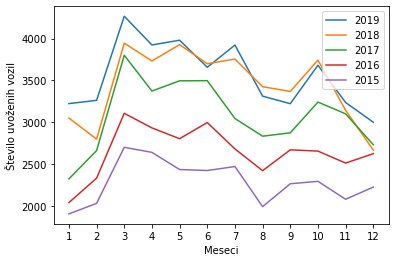

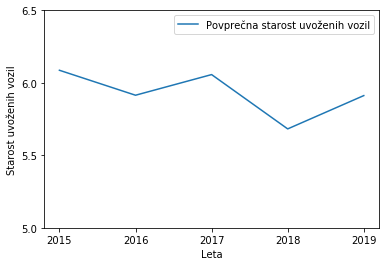

In [3]:
leta = list(uvozena_vozila_starost.keys())
st_uvozenih_vozil = [len(j) for i, j in uvozena_vozila_starost.items()]
povprecna_starost_vozil = [(sum(j) / len(j)) for i, j in uvozena_vozila_starost.items()]

meseci = [i for i in range(1,13)]
uvozeni_2015 = st_uvozenih_vozil[:12]
uvozeni_2016 = st_uvozenih_vozil[12:24]
uvozeni_2017 = st_uvozenih_vozil[24:36]
uvozeni_2018 = st_uvozenih_vozil[36:48]
uvozeni_2019 = st_uvozenih_vozil[48:60]

uvozeni_starost_2015 = povprecna_starost_vozil[:12]
uvozeni_starost_2016 = povprecna_starost_vozil[12:24]
uvozeni_starost_2017 = povprecna_starost_vozil[24:36]
uvozeni_starost_2018 = povprecna_starost_vozil[36:48]
uvozeni_starost_2019 = povprecna_starost_vozil[48:60]


plt.plot(meseci, uvozeni_2019, label='2019')
plt.plot(meseci, uvozeni_2018, label='2018')
plt.plot(meseci, uvozeni_2017, label='2017')
plt.plot(meseci, uvozeni_2016, label='2016')
plt.plot(meseci, uvozeni_2015, label='2015')
plt.xlabel('Meseci')
plt.xticks(meseci)
plt.ylabel('Število uvoženih vozil')
plt.legend()
plt.show()

povp_starost = [(sum(uvozeni_starost_2015)/len(uvozeni_starost_2015)), (sum(uvozeni_starost_2016)/len(uvozeni_starost_2016)), (sum(uvozeni_starost_2017)/len(uvozeni_starost_2017)), (sum(uvozeni_starost_2018)/len(uvozeni_starost_2018)), (sum(uvozeni_starost_2019)/len(uvozeni_starost_2019))]


plt.plot([2015, 2016, 2017, 2018, 2019], povp_starost, label='Povprečna starost uvoženih vozil')
plt.xlabel('Leta')
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.yticks([5, 5.5, 6, 6.5])
plt.ylabel('Starost uvoženih vozil')
plt.legend()
plt.show()



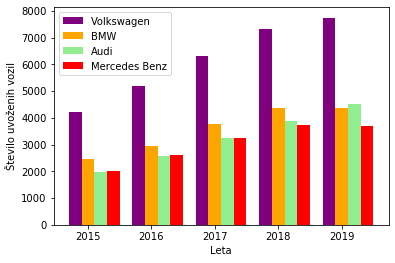

In [4]:
volkswagen = [j['VOLKSWAGEN'] for i, j in uvozena_vozila_znamka.items()]
bmw = [j['BMW'] for i, j in uvozena_vozila_znamka.items()]
audi = [j['AUDI'] for i, j in uvozena_vozila_znamka.items()]
mb = [j['MERCEDES BENZ'] for i, j in uvozena_vozila_znamka.items()]
leta = list(uvozena_vozila_znamka.keys())


plt.bar([i-0.2 for i in leta], volkswagen, width=0.2, color='purple', align='center', label='Volkswagen')
plt.bar(leta, bmw, width=0.2, color='orange', align='center', label='BMW')
plt.bar([i+0.2 for i in leta], audi, width=0.2, color='lightgreen', align='center', label='Audi')
plt.bar([i+0.4 for i in leta], mb, width=0.2, color='r', align='center', label='Mercedes Benz')
plt.xlabel('Leta')
plt.ylabel('Število uvoženih vozil')
plt.legend(loc=2)
plt.show()

In [5]:
import numpy as np
import scipy.stats
from scipy.stats import pearsonr

pearsonova_korelacija = pearsonr(uvozen_da_ne, drzava_da_ne)[0]
print("Pearsonova korelacija:", pearsonova_korelacija)

Pearsonova korelacija: -0.14747582913794574


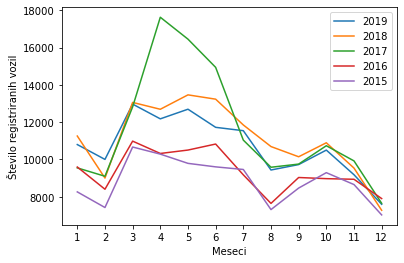

In [9]:
from csv import DictReader
import operator
import matplotlib.pyplot as plt
from datetime import datetime

vozila_starost = dict()
vozila_znamka = dict()
vozila_drzava = dict()



for j in range(2015,2020):    
    for i in range(1,13):
        file = 'podatki/Podatki_{:02d}'.format(i) + str(j) + '.csv'
        podatki = DictReader(open(file, 'rt', encoding='ANSI'), delimiter=';')
        
        if str(j) + '_' + str(i) not in vozila_starost:
            vozila_starost[str(j) + '_' + str(i)] = []

        for row in podatki:
            status = str(row['Status vozila (opis)'])
            try:
                prva_registracija = datetime.strptime(str(row['B-Datum prve registracije vozila']), '%d.%m.%Y')
                prva_registracija_SLO = datetime.strptime(str(row['2A-Datum prve registracije vozila v SLO']), '%d.%m.%Y')
                drzava = str(row['D.4.2-Drzava (opis)'])
                
                
                if status == 'registrirano':
                    vozila_starost[str(j) + '_' + str(i)].append(prva_registracija_SLO.year - prva_registracija.year)
                    znamka = str(row['D.1-Znamka'])
                    
            except:
                #Napaka v datumu vozila
                None

leta = list(vozila_starost.keys())
st_uvozenih_vozil = [len(j) for i, j in vozila_starost.items()]
povprecna_starost_vozil = [(sum(j) / len(j)) for i, j in vozila_starost.items()]

meseci = [i for i in range(1,13)]
uvozeni_2015 = st_uvozenih_vozil[:12]
uvozeni_2016 = st_uvozenih_vozil[12:24]
uvozeni_2017 = st_uvozenih_vozil[24:36]
uvozeni_2018 = st_uvozenih_vozil[36:48]
uvozeni_2019 = st_uvozenih_vozil[48:60]

uvozeni_starost_2015 = povprecna_starost_vozil[:12]
uvozeni_starost_2016 = povprecna_starost_vozil[12:24]
uvozeni_starost_2017 = povprecna_starost_vozil[24:36]
uvozeni_starost_2018 = povprecna_starost_vozil[36:48]
uvozeni_starost_2019 = povprecna_starost_vozil[48:60]


plt.plot(meseci, uvozeni_2019, label='2019')
plt.plot(meseci, uvozeni_2018, label='2018')
plt.plot(meseci, uvozeni_2017, label='2017')
plt.plot(meseci, uvozeni_2016, label='2016')
plt.plot(meseci, uvozeni_2015, label='2015')
plt.xlabel('Meseci')
plt.xticks(meseci)
plt.ylabel('Število registriranih vozil')
plt.legend()
plt.show()